<a href="https://colab.research.google.com/github/PhanTruong-Thinh/Machine_Learning_20130181/blob/main/Lab_6_20130181_PhanTruongThinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



In [5]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Machine Learning

Mounted at /content/drive
/content/drive/MyDrive/Machine Learning


# Import libraries

In [6]:
import pandas as pd
import numpy as np
from numpy import set_printoptions
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.impute import SimpleImputer
from sklearn import naive_bayes
from sklearn.feature_selection import SelectKBest, f_classif, chi2
%matplotlib inline


# Task 1

Task 1. Compare the performance of selected classification algorithms including Random forest, NaiveBayes, and SVM with mnist dataset based on accuracy, precision, recall, f1 measures according to without using selection feature and using selection feature.

In [55]:
#load data
data = datasets.load_digits(as_frame=True)

X = data['data']
Y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.4, random_state=11)
X_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0
1754,0.0,0.0,0.0,0.0,13.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15.0,7.0,0.0,0.0
1553,0.0,0.0,1.0,8.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,12.0,5.0,0.0,0.0
330,0.0,0.0,5.0,8.0,12.0,16.0,4.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,7.0,13.0,7.0,0.0,0.0,0.0
1205,0.0,2.0,8.0,15.0,16.0,10.0,0.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,7.0,16.0,14.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0.0,0.0,0.0,11.0,13.0,0.0,0.0,0.0,0.0,0.0,...,16.0,2.0,0.0,0.0,1.0,11.0,16.0,15.0,4.0,0.0
1361,0.0,0.0,4.0,9.0,13.0,13.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,3.0,12.0,14.0,8.0,0.0,0.0
1115,0.0,0.0,1.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,...,14.0,5.0,0.0,0.0,1.0,11.0,16.0,16.0,13.0,1.0
1104,0.0,1.0,11.0,16.0,16.0,10.0,0.0,0.0,0.0,8.0,...,6.0,0.0,0.0,0.0,14.0,16.0,13.0,13.0,16.0,5.0


# 1.1 without using selection feature





Accuracy:  0.9825
Precision:  0.9825
Recall:  0.9825
F1:  0.9825


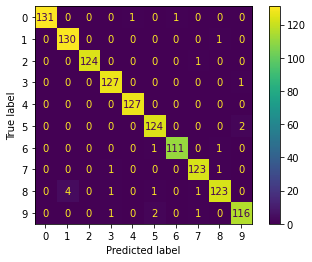

In [14]:
#SVM

clf_Svm = SVC(kernel='poly')
clf_Svm.fit(X_train, y_train)
y_pred_Svm = clf_Svm.predict(X_test)

accs_Svm=round(metrics.accuracy_score(y_test, y_pred_Svm), 4)
pre_Svm=round(metrics.precision_score(y_test, y_pred_Svm, average='micro'), 4)
recall_Svm=round(metrics.recall_score(y_test, y_pred_Svm, average='micro'), 4)
f1_Svm=round(metrics.f1_score(y_test, y_pred_Svm, average='micro'), 4)

print('Accuracy: ', accs_Svm)
print('Precision: ', pre_Svm)
print('Recall: ', recall_Svm)
print('F1: ', f1_Svm)

metrics.ConfusionMatrixDisplay.from_estimator(clf_Svm, X_test, y_test)



Accuracy:  0.9465
Precision:  0.9465
Recall:  0.9465
F1:  0.9465


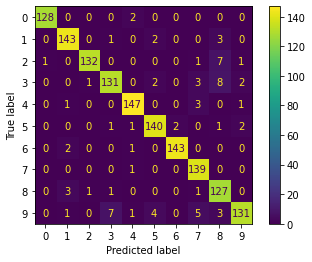

In [21]:
#Random forest

clf_ran=RandomForestClassifier(n_estimators=100)

clf_ran.fit(X_train,y_train)
y_pred_ran = clf_ran.predict(X_test)

accs_ran=round(metrics.accuracy_score(y_test, y_pred_ran), 4)
pre_ran=round(metrics.precision_score(y_test, y_pred_ran, average='micro'), 4)
recall_ran=round(metrics.recall_score(y_test, y_pred_ran, average='micro'), 4)
f1_ran=round(metrics.f1_score(y_test, y_pred_ran, average='micro'), 4)

print('Accuracy: ', accs_ran)
print('Precision: ', pre_ran)
print('Recall: ', recall_ran)
print('F1: ', f1_ran)

metrics.ConfusionMatrixDisplay.from_estimator(clf_ran, X_test, y_test)


In [57]:
#NaiveBayes
# 1. GaussianNB
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
y_pred_Gau = model.predict(X_test)

accs_Gau=round(metrics.accuracy_score(y_test, y_pred_Gau), 4)
pre_Gau=round(metrics.precision_score(y_test, y_pred_Gau, average='micro'), 4)
recall_Gau=round(metrics.recall_score(y_test, y_pred_Gau, average='micro'), 4)
f1_Gau=round(metrics.f1_score(y_test, y_pred_Gau, average='micro'), 4)

# 2. CategoricalNB
# model_ca = naive_bayes.CategoricalNB(force_alpha=True).fit(X_train, y_train)
# y_pred_cat = model_ca.predict(X_test)

# accs_cat=round(metrics.accuracy_score(y_test, y_pred_cat), 4)
# pre_cat=round(metrics.precision_score(y_test, y_pred_cat, average='micro'), 4)
# recall_cat=round(metrics.recall_score(y_test, y_pred_cat, average='micro'), 4)
# f1_cat=round(metrics.f1_score(y_test, y_pred_cat, average='micro'), 4)

# 3. BernoulliNB
model_ber = naive_bayes.BernoulliNB().fit(X_train, y_train)
y_pred_ber = model_ber.predict(X_test)

accs_ber=round(metrics.accuracy_score(y_test, y_pred_ber), 4)
pre_ber=round(metrics.precision_score(y_test, y_pred_ber, average='micro'), 4)
recall_ber=round(metrics.recall_score(y_test, y_pred_ber, average='micro'), 4)
f1_ber=round(metrics.f1_score(y_test, y_pred_ber, average='micro'), 4)

# 4. MultinomialNB
model_mul = naive_bayes.MultinomialNB().fit(X_train, y_train)
y_pred_mul = model_ber.predict(X_test)

accs_mul=round(metrics.accuracy_score(y_test, y_pred_mul), 4)
pre_mul=round(metrics.precision_score(y_test, y_pred_mul, average='micro'), 4)
recall_mul=round(metrics.recall_score(y_test, y_pred_mul, average='micro'), 4)
f1_mul=round(metrics.f1_score(y_test, y_pred_mul, average='micro'), 4)

#table
tab = PrettyTable()
tab.field_names =["name","Accuracy","Precision","Recall","F1"]

tab.add_row(["GaussiaNB", accs_Gau, pre_Gau, recall_Gau, f1_Gau])
# tab.add_row(["CategoricalB", accs_cat, pre_cat, recall_cat, f1_cat])
tab.add_row(["BeroulliNB", accs_ber, pre_ber, recall_ber, f1_ber])
tab.add_row(["MultinomalNB", accs_mul, pre_mul, recall_mul, f1_mul])

print(tab)


+--------------+----------+-----------+--------+--------+
|     name     | Accuracy | Precision | Recall |   F1   |
+--------------+----------+-----------+--------+--------+
|  GaussiaNB   |  0.8563  |   0.8563  | 0.8563 | 0.8563 |
|  BeroulliNB  |  0.8276  |   0.8276  | 0.8276 | 0.8276 |
| MultinomalNB |  0.8276  |   0.8276  | 0.8276 | 0.8276 |
+--------------+----------+-----------+--------+--------+


In [58]:
table = PrettyTable()
table.field_names =["","Accuracy","Precision","Recall","F1"]

table.add_row(["SVM", accs_Svm, pre_Svm, recall_Svm, f1_Svm])
table.add_row(["Random forest", accs_ran, pre_ran, recall_ran, f1_ran])
table.add_row(["GaussiaNB", accs_Gau, pre_Gau, recall_Gau, f1_Gau])
# table.add_row(["CategoricalB", accs_cat, pre_cat, recall_cat, f1_cat])
table.add_row(["BeroulliNB", accs_ber, pre_ber, recall_ber, f1_ber])
table.add_row(["MultinomalNB", accs_mul, pre_mul, recall_mul, f1_mul])

print(table)

+---------------+----------+-----------+--------+--------+
|               | Accuracy | Precision | Recall |   F1   |
+---------------+----------+-----------+--------+--------+
|      SVM      |  0.9825  |   0.9825  | 0.9825 | 0.9825 |
| Random forest |  0.9992  |   0.9992  | 0.9992 | 0.9992 |
|   GaussiaNB   |  0.8563  |   0.8563  | 0.8563 | 0.8563 |
|   BeroulliNB  |  0.8276  |   0.8276  | 0.8276 | 0.8276 |
|  MultinomalNB |  0.8276  |   0.8276  | 0.8276 | 0.8276 |
+---------------+----------+-----------+--------+--------+


# 1.2 using selection feature

pixel_2_5    0.059878
pixel_4_4    0.042845
pixel_3_2    0.037581
pixel_3_4    0.035299
pixel_5_3    0.035273
               ...   
pixel_3_7    0.000000
pixel_3_0    0.000000
pixel_2_0    0.000000
pixel_1_0    0.000000
pixel_4_0    0.000000
Length: 64, dtype: float64


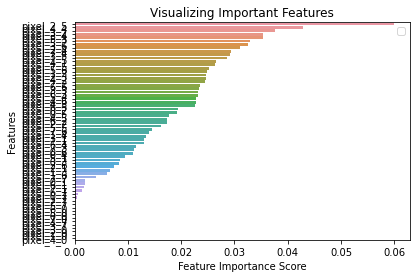

Accuracy:  0.9508804448563485
Precision:  0.9508804448563485
Recall:  0.9508804448563485
F1:  0.9508804448563485


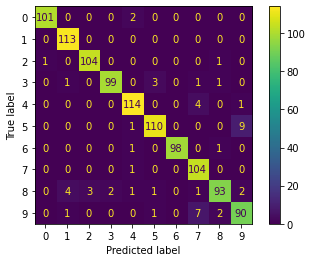

In [59]:
#Random forest

clf_ran_for=RandomForestClassifier(n_estimators=100)

clf_ran_for.fit(X_train,y_train)

# Mức độ quan trọng của các thuộc tính, sau đó xếp theo thứ tự giảm dần
feature_imp = pd.Series(clf_ran_for.feature_importances_,index=data.feature_names).sort_values(ascending=False)
print(feature_imp)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


# features = feature_imp.index[0:5].values
X_new = X[feature_imp.index[0:5]]
X_new


X1_train, X1_test, y1_train, y1_test = train_test_split(X_new, Y, test_size=0.3, random_state=1)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred_for=clf.predict(X_test)

accs_for=(metrics.accuracy_score(y_test, y_pred_for))
pre_for=(metrics.precision_score(y_test, y_pred_for, average='micro'))
recall_for=(metrics.recall_score(y_test, y_pred_for, average='micro'))
f1_for=(metrics.f1_score(y_test, y_pred_for, average='micro'))

print('Accuracy: ', accs_for)
print('Precision: ', pre_for)
print('Recall: ', recall_for)
print('F1: ', f1_for)

metrics.ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

Accuracy:  0.6944
Precision:  0.6944
Recall:  0.6944
F1:  0.6944


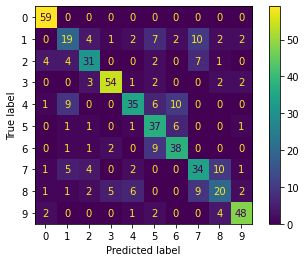

In [60]:
clf_Svm1 = SVC(kernel='poly')
clf_Svm1.fit(X1_train, y1_train)
y_pred_Svm1 = clf_Svm1.predict(X1_test)

accs_Svm1=round(metrics.accuracy_score(y1_test, y_pred_Svm1), 4)
pre_Svm1=round(metrics.precision_score(y1_test, y_pred_Svm1, average='micro'), 4)
recall_Svm1=round(metrics.recall_score(y1_test, y_pred_Svm1, average='micro'), 4)
f1_Svm1=round(metrics.f1_score(y1_test, y_pred_Svm1, average='micro'), 4)

print('Accuracy: ', accs_Svm1)
print('Precision: ', pre_Svm1)
print('Recall: ', recall_Svm1)
print('F1: ', f1_Svm1)

metrics.ConfusionMatrixDisplay.from_estimator(clf_Svm1, X1_test, y1_test)

Accuracy:  0.6315
Precision:  0.6315
Recall:  0.6315
F1:  0.6315


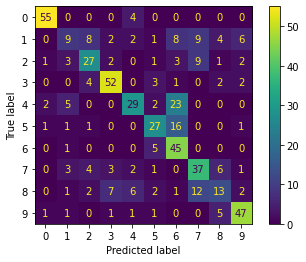

In [61]:
#NaiveBayes
# 1. GaussianNB
model1 = naive_bayes.GaussianNB().fit(X1_train, y1_train)
y_pred_Gau1 = model1.predict(X1_test)

accs_Gau1=round(metrics.accuracy_score(y1_test, y_pred_Gau1), 4)
pre_Gau1=round(metrics.precision_score(y1_test, y_pred_Gau1, average='micro'), 4)
recall_Gau1=round(metrics.recall_score(y1_test, y_pred_Gau1, average='micro'), 4)
f1_Gau1=round(metrics.f1_score(y1_test, y_pred_Gau1, average='micro'), 4)


print('Accuracy: ', accs_Gau1)
print('Precision: ', pre_Gau1)
print('Recall: ', recall_Gau1)
print('F1: ', f1_Gau1)

metrics.ConfusionMatrixDisplay.from_estimator(model1, X1_test, y1_test)

#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



#3.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [45]:
dataset = pd.read_csv("bank.csv")

sc= StandardScaler()
dataset[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']]=sc.fit_transform(dataset[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']])
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1042,-0.554168,-0.481184,-0.363260,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,1467,-0.554168,-0.481184,-0.363260,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,1389,-0.554168,-0.481184,-0.363260,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,579,-0.554168,-0.481184,-0.363260,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,673,-0.186785,-0.481184,-0.363260,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,blue-collar,single,primary,no,-0.473616,yes,no,cellular,0.515650,apr,257,-0.554168,-0.481184,-0.363260,unknown,no
11158,-0.187357,services,married,secondary,no,-0.246658,no,no,unknown,0.040612,jun,83,0.547981,-0.481184,-0.363260,unknown,no
11159,-0.774958,technician,single,secondary,no,-0.464934,no,no,cellular,0.396891,aug,156,-0.186785,-0.481184,-0.363260,unknown,no
11160,0.148416,technician,married,secondary,no,-0.473926,no,yes,cellular,-0.909466,may,9,-0.186785,1.109571,1.818332,failure,no


#3.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [46]:
encoder = OneHotEncoder()
encoded_data =encoder.fit_transform(dataset[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']))
data_encoded = pd.concat([dataset, encoded_df], axis=1)
data_encoded.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], inplace=True)

data_encoded

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,no,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,no,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,no,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#3.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

In [47]:
data_encoded['deposit']= data_encoded['deposit'].map({'yes':1, 'no':0})
x_train, x_test, y_train, y_test = train_test_split(data_encoded.drop(['deposit'],axis=1), data_encoded['deposit'], test_size=0.3, random_state=1)
data_encoded
y_train

2506     1
368      1
2827     1
9197     0
9910     0
        ..
7813     0
10955    0
905      1
5192     1
235      1
Name: deposit, Length: 7813, dtype: int64

Accuracy: 0.7975515079128098
Precision: 0.7830950901180858
Recall: 0.7929515418502202
F1: 0.7879924953095685


'              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.81      1760\n           1       0.78      0.79      0.79      1589\n\n    accuracy                           0.80      3349\n   macro avg       0.80      0.80      0.80      3349\nweighted avg       0.80      0.80      0.80      3349\n'

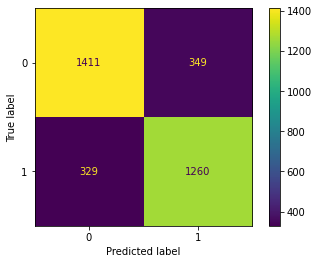

In [48]:
# decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
tree_ac = metrics.accuracy_score(y_test, y_predict)
tree_ps = metrics.precision_score(y_test, y_predict)
tree_rs = metrics.recall_score(y_test, y_predict)
tree_fs = metrics.f1_score(y_test, y_predict)

print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)

metrics.confusion_matrix(y_test, y_predict)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
metrics.classification_report(y_test,y_predict)

#3.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


Accuracy: 0.7975515079128098
Precision: 0.7830950901180858
Recall: 0.7929515418502202
F1: 0.7879924953095685
[[1411  349]
 [ 329 1260]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1760
           1       0.78      0.79      0.79      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1760
           1       0.78      0.79      0.79      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[1 1 1 ... 1 1 1]


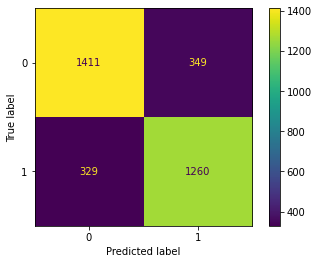

In [49]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
clf = SelectKBest(chi2, k=40)
X_train_selected = clf.fit_transform(x_train, y_train)
X_test_selected = clf.transform(x_test)

ga_ac = metrics.accuracy_score(y_test, y_predict)
ga_ps = metrics.precision_score(y_test, y_predict)
ga_rs = metrics.recall_score(y_test, y_predict)
ga_fs = metrics.f1_score(y_test, y_predict)

print('Accuracy:',ga_ac)
print('Precision:',ga_ps)
print('Recall:',ga_rs)
print('F1:',ga_fs)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(metrics.classification_report(y_test,y_predict))

print(metrics.classification_report(y_test, y_predict))
ga = naive_bayes.GaussianNB()
ga.fit(X_train_selected, y_train)
y_predict = ga.predict(X_test_selected)
print(y_predict)

#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


In [ ]:
# unzip

!unzip creditcard.csv.zip

Archive:  creditcard.csv.zip
  inflating: creditcard.csv          


In [34]:
#Loading data

dataset = pd.read_csv('creditcard.csv')
X = dataset.drop('Class', axis=1)
y = dataset['Class']
#Chuan hoa du lieu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.03,train_size=0.22, random_state=1)

Accuracy: 0.9992978349912229
Precision: 0.9441515672185775
Recall: 0.8076337047856035
F1: 0.863460596118201
[[8531    1]
 [   5    8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8532
           1       0.89      0.62      0.73        13

    accuracy                           1.00      8545
   macro avg       0.94      0.81      0.86      8545
weighted avg       1.00      1.00      1.00      8545



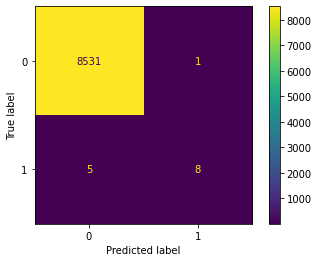

In [35]:
#SVC
clf = SVC().fit(x_train, y_train)
y_predict = clf.predict(x_test)
svm_ac = metrics.accuracy_score(y_test, y_predict)
svm_ps = metrics.precision_score(y_test, y_predict, average='macro')
svm_rs = metrics.recall_score(y_test, y_predict, average='macro')
svm_fs = metrics.f1_score(y_test, y_predict, average='macro')

print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(metrics.classification_report(y_test,y_predict))

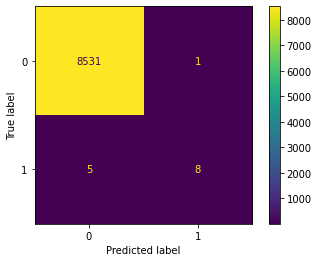

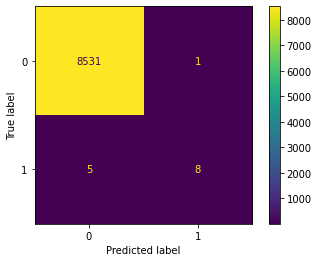

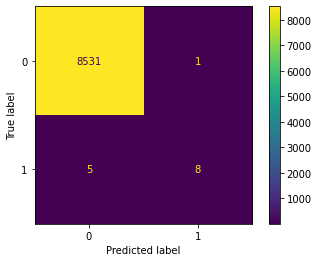

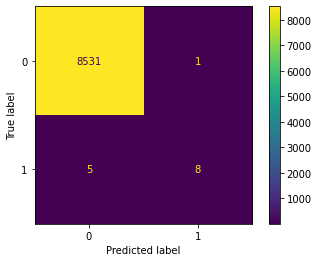

In [37]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(metrics.accuracy_score(y_test, pred))
  prec.append(metrics.precision_score(y_test, pred, average='macro'))
  recall.append( metrics.recall_score(y_test, pred, average='macro'))
  f1.append(metrics.f1_score(y_test, pred, average='macro'))
  metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)


Accuracy: 0.9988297249853716
Precision: 0.8178302831454929
Recall: 0.7689963576039525
F1: 0.7913736864721278
[[8528    4]
 [   6    7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8532
           1       0.64      0.54      0.58        13

    accuracy                           1.00      8545
   macro avg       0.82      0.77      0.79      8545
weighted avg       1.00      1.00      1.00      8545



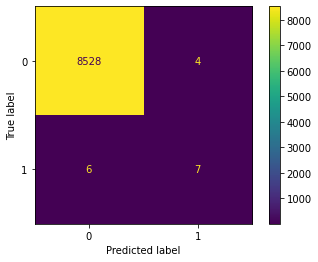

In [38]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train) 
y_predict = logistic.predict(x_test)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict, average='macro')
rs = metrics.recall_score(y_test, y_predict, average='macro')
fs = metrics.f1_score(y_test, y_predict, average='macro')

print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(metrics.classification_report(y_test,y_predict))

Accuracy:  0.9992
Precision:  0.9992
Recall:  0.9992
F1:  0.9992


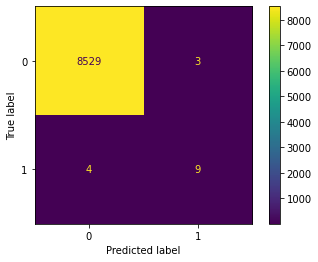

In [39]:
#Random forest

clf_ran=RandomForestClassifier(n_estimators=100)

clf_ran.fit(x_train,y_train)
y_pred_ran = clf_ran.predict(x_test)

accs_ran=round(metrics.accuracy_score(y_test, y_pred_ran), 4)
pre_ran=round(metrics.precision_score(y_test, y_pred_ran, average='micro'), 4)
recall_ran=round(metrics.recall_score(y_test, y_pred_ran, average='micro'), 4)
f1_ran=round(metrics.f1_score(y_test, y_pred_ran, average='micro'), 4)

print('Accuracy: ', accs_ran)
print('Precision: ', pre_ran)
print('Recall: ', recall_ran)
print('F1: ', f1_ran)

metrics.ConfusionMatrixDisplay.from_estimator(clf_ran, x_test, y_test)

In [43]:
#NaiveBayes
# 1. GaussianNB
model = naive_bayes.GaussianNB().fit(x_train, y_train)
y_pred_Gau = model.predict(x_test)

accs_Gau=round(metrics.accuracy_score(y_test, y_pred_Gau), 4)
pre_Gau=round(metrics.precision_score(y_test, y_pred_Gau, average='micro'), 4)
recall_Gau=round(metrics.recall_score(y_test, y_pred_Gau, average='micro'), 4)
f1_Gau=round(metrics.f1_score(y_test, y_pred_Gau, average='micro'), 4)

# 2. CategoricalNB
# model = naive_bayes.CategoricalNB().fit(x_train, y_train)
# y_pred_cat = model.predict(x_test)

# accs_cat=round(metrics.accuracy_score(y_test, y_pred_cat), 4)
# pre_cat=round(metrics.precision_score(y_test, y_pred_cat, average='micro'), 4)
# recall_cat=round(metrics.recall_score(y_test, y_pred_cat, average='micro'), 4)
# f1_cat=round(metrics.f1_score(y_test, y_pred_cat, average='micro'), 4)

# 3. BernoulliNB
model_ber = naive_bayes.BernoulliNB().fit(x_train, y_train)
y_pred_ber = model_ber.predict(x_test)

accs_ber=round(metrics.accuracy_score(y_test, y_pred_ber), 4)
pre_ber=round(metrics.precision_score(y_test, y_pred_ber, average='micro'), 4)
recall_ber=round(metrics.recall_score(y_test, y_pred_ber, average='micro'), 4)
f1_ber=round(metrics.f1_score(y_test, y_pred_ber, average='micro'), 4)

# 4. MultinomialNB
# model_mul = naive_bayes.MultinomialNB().fit(x_train, y_train)
# y_pred_mul = model_ber.predict(x_test)

# accs_mul=round(metrics.accuracy_score(y_test, y_pred_mul), 4)
# pre_mul=round(metrics.precision_score(y_test, y_pred_mul, average='micro'), 4)
# recall_mul=round(metrics.recall_score(y_test, y_pred_mul, average='micro'), 4)
# f1_mul=round(metrics.f1_score(y_test, y_pred_mul, average='micro'), 4)

#table
tab = PrettyTable()
tab.field_names =["name","Accuracy","Precision","Recall","F1"]

tab.add_row(["GaussiaNB", accs_Gau, pre_Gau, recall_Gau, f1_Gau])
# tab.add_row(["CategoricalB", accs_cat, pre_cat, recall_cat, f1_cat])
# tab.add_row(["BeroulliNB", accs_ber, pre_ber, recall_ber, f1_ber])
tab.add_row(["MultinomalNB", accs_mul, pre_mul, recall_mul, f1_mul])

print(tab)

+--------------+----------+-----------+--------+--------+
|     name     | Accuracy | Precision | Recall |   F1   |
+--------------+----------+-----------+--------+--------+
|  GaussiaNB   |  0.9739  |   0.9739  | 0.9739 | 0.9739 |
| MultinomalNB |  0.8289  |   0.8289  | 0.8289 | 0.8289 |
+--------------+----------+-----------+--------+--------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.